<a href="https://colab.research.google.com/github/fredvasconcelos/lis_data/blob/main/DS_Prueba_tecnica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba Técnica DS

El proposito de esta prueba técnica es comprobar si el candidato posee conocimientos de Python (básico y aplicados a ML). Desde Python 3, aconsejamos usar las siguientes librerias (salvo que se indique lo contrario): **numpy, pandas, matplotlib**



## Bloque 1: Python general

### 1.1: Escribe una función que te devuelva una matriz de números aleatorios entre 1 y 100 con 2 decimales. El número de filas y columnas de la matriz será determinado por sendos parámetros. Utiliza la función para crear una matriz de 10 filas y 7 columnas.
<font color="#9E1B32">**(No utilices NUMPY ni PANDAS en este apartado 1.1, en los demás puedes usarlo)**</font>


Se probaron dos métodos distintos para crear una matriz con 10,000 filas y 100 columnas: el primero utilizando *list comprehension* y el segundo concatenando *dos bucles 'for'*. El primer método demostró ser más eficiente, con un tiempo de ejecución de 7,4 segundos, mientras que el segundo tardó 7,6 segundos. Aunque ambos métodos son viables, el uso de list comprehension presentó una ligera ventaja en términos de rendimiento.

In [ ]:
import random
import pprint
from typing import List

def matriz_aleatoria(filas: int, columnas: int, decimales: int = 2) -> List[List[float]]:
    """
    Genera una matriz de números aleatorios entre 1 y 100 con un número específico de decimales.

    Parámetros:
    - filas (int): Número de filas de la matriz.
    - columnas (int): Número de columnas de la matriz.
    - decimales (int, opcional): Número de decimales para redondear los valores. Por defecto es 2.

    Retorna:
    - List[List[float]]: Una matriz (lista de listas) con números aleatorios redondeados al número de decimales especificados.
    """

    # Genera una matriz de números aleatorios entre 1 y 100 con el número de decimales especificado
    matriz = [[round(random.uniform(1, 100), decimales) for _ in range(columnas)] for _ in range(filas)]
    return matriz

In [5]:
# Ejemplo de uso: crear una matriz de 10 filas y 7 columnas con 2 decimales (valor por defecto)
matriz = matriz_aleatoria(10, 7)

### 1.2 Normaliza los elementos de la matriz anterior, de modo que todos los valores se encuentren entre 0 y 1


In [6]:
import numpy as np
from sklearn.preprocessing import normalize

matriz_normalizada = normalize(matriz)
pprint.pp(matriz_normalizada)

array([[0.4103341 , 0.28837552, 0.04720269, 0.48108326, 0.45051128,
        0.40638225, 0.38300045],
       [0.50300706, 0.26101093, 0.50374938, 0.35762666, 0.19197522,
        0.29344458, 0.41741192],
       [0.32850794, 0.59860094, 0.1300645 , 0.41582609, 0.06716196,
        0.02228591, 0.58217174],
       [0.59431602, 0.27002871, 0.38634229, 0.12621709, 0.47610602,
        0.38992441, 0.17310073],
       [0.06248025, 0.57455048, 0.37587143, 0.17992916, 0.54619272,
        0.12426175, 0.42257149],
       [0.12249179, 0.08795781, 0.45270682, 0.13631837, 0.54715597,
        0.47834765, 0.47490724],
       [0.35783633, 0.40275375, 0.48183616, 0.10417142, 0.5743302 ,
        0.03376033, 0.36841534],
       [0.0969719 , 0.18704493, 0.33944042, 0.32579769, 0.72686294,
        0.39253854, 0.22766305],
       [0.15475442, 0.6838902 , 0.48858183, 0.08331868, 0.06100364,
        0.16297575, 0.48208767],
       [0.57621105, 0.34761508, 0.34609966, 0.1255471 , 0.59684414,
        0.20434918, 0.1

### 1.3: A partir de la matriz normalizada, filtra todos aquellos valores comprendidos entre 0.10 y 0.90
El resultado debe ser un vector con dichos valores ordenados descendentemente

In [7]:
matriz_filtered = np.sort(matriz_normalizada[(matriz_normalizada >= .10) & (matriz_normalizada <= .90)])[::-1]
pprint.pp(matriz_filtered)

array([0.72686294, 0.6838902 , 0.59860094, 0.59684414, 0.59431602,
       0.58217174, 0.57621105, 0.57455048, 0.5743302 , 0.54715597,
       0.54619272, 0.50374938, 0.50300706, 0.48858183, 0.48208767,
       0.48183616, 0.48108326, 0.47834765, 0.47610602, 0.47490724,
       0.45270682, 0.45051128, 0.42257149, 0.41741192, 0.41582609,
       0.4103341 , 0.40638225, 0.40275375, 0.39253854, 0.38992441,
       0.38634229, 0.38300045, 0.37587143, 0.36841534, 0.35783633,
       0.35762666, 0.34761508, 0.34609966, 0.33944042, 0.32850794,
       0.32579769, 0.29344458, 0.28837552, 0.27002871, 0.26101093,
       0.22766305, 0.20434918, 0.19197522, 0.18704493, 0.17992916,
       0.17310073, 0.16297575, 0.15475442, 0.13631837, 0.1300645 ,
       0.12621709, 0.1255471 , 0.12426175, 0.12249179, 0.11668769,
       0.10417142])


## Bloque 2: Exploración de Datos

Se dispone de un conjunto de datos que contiene observaciones de vuelos nacionales estadounidenses en 2023, almacenado en el fichero vuelos.csv,  que consta de los siguientes campos:

* Fecha: La fecha del vuelo, en formato YYYY-MM-DD
* Compañía: La abreviatura de dos letras de la compañía aérea.
* AeropuertoOrigenID: Identificador numérico único del aeropuerto de salida.
* AeropuertoOrigen: El nombre completo del aeropuerto de salida
* AeropuertoDestinoID: Identificador numérico único del aeropuerto de destino
* AeropuertoDestino: El nombre completo del aeropuerto de destino
* HoraSalidaProgramada: La hora de salida programada
* RetrasoSalida: El número de minutos que se retrasó la salida (los vuelos que salieron antes de lo previsto tienen un valor negativo)
* SalidaTarde: Un indicador binario de que la salida se retrasó más de 15 minutos (y por lo tanto se considera "tarde"). Si se retrasa menos, se considera "puntual".
* HoraLlegadaProgramada: La hora de llegada programada
* RetrasoLlegada: El número de minutos que se retrasó la llegada (el vuelo que llegó antes de lo previsto tiene un valor negativo)
* LlegadaTarde: Un indicador binario de que la llegada se retrasó más de 15 minutos (y por lo tanto se considera "tarde"). Si se retrasa menos, se considera "puntual".
* Cancelado: Un indicador binario que indica si l vuelo fue cancelado

## El reto consiste en explorar los datos de los vuelos para analizar los posibles factores que afectan a los retrasos en la salida o llegada.

### 2.1 Empezaremos por limpiar los datos.
* Identifica cualquier dato nulo o faltante, y tratalo convenientemente.
* Identifica y elimina cualquier valor atípico (outliers) en las columnas que determinan los retrasos de llegada y salida.
### 2.2 Utilice estadísticas, funciones de agregación y visualizaciones para responder a las siguientes preguntas:
* ¿Cuáles son los retrasos medios de salida y llegada?
* ¿Cómo se comportan las compañías aéreas en cuanto a los retrasos de llegada y salida medios se refiere?
* ¿Qué aeropuerto tiene el mayor número de retrasos de salida?

<font color="#9E1B32">**(Justifica y explica todas tus respuestas y acciones, con comentarios apropiados.)**</font>



# 3 Data Cleaning

In [8]:
!pip install skimpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.3 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 1.9.0
    Uninstalling polars-1.9.0:
      Successfully uninstalled polars-1.9.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pand

In [9]:
import pandas as pd
from skimpy import skim, skim_get_data, clean_columns

### 3.1 Descripción del dataset

In [11]:
df = pd.read_csv("./DS/vuelos.csv")
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 271940 │ │ int64       │ 8     │                                                          │
│ │ Number of columns │ 13     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column         ┃ NA   ┃ NA %           ┃ mean    ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ AeropuertoOrig │    0 │              0 │   12740 │   1501 │ 10140 │ 11290 │ 12890 │ 14060 │ 15380 │ ▆█▄█▆▇ │  │
│ │ enID           │      │                │         │        │       │       │       │       │       │        │  │
│ │ AeropuertoDest │    0 │              0 │   12740 │   1503 │ 10140 │ 11290 │ 12890 │ 14060 │ 15380 │ ▆█▄█▆▇ │  │
│ │ inoID          │      │                │         │        │       │       │       │       │       │        │  │
│ │ HoraSalidaProg │    0 │              0 │    1325 │  470.7 │     1 │   920 │  1320 │  1725 │  2359 │  ▅███▃ │  │
│ │ ramada         │      │                │         │        │       │       │       │       │       │        │  │
│ │ RetrasoSalida  │    0 │              0 │   10.35 │  35.67 │   -63 │    -4 │    -1 │     9 │  1425 │   █    │  │
│ │ SalidaTarde    │ 2761 │ 1.015297492093 │  0.2011 │ 0.4008 │     0 │     0 │     0 │     0 │     1 │ █    ▂ │  │
│ │                │      │           8442 │         │        │       │       │       │       │       │        │  │
│ │ HoraLlegadaPro │    0 │              0 │    1505 │  493.2 │     1 │  1119 │  1529 │  1918 │  2359 │  ▁▇▇█▆ │  │
│ │ gramada        │      │                │         │        │       │       │       │       │       │        │  │
│ │ RetrasoLlegada │    0 │              0 │   6.497 │  38.23 │   -75 │   -11 │    -3 │    10 │  1440 │   █    │  │
│ │ LlegadaTarde   │    0 │              0 │  0.2159 │ 0.4115 │     0 │     0 │     0 │     0 │     1 │ █    ▂ │  │
│ │ Cancelado      │    0 │              0 │ 0.01072 │  0.103 │     0 │     0 │     0 │     0 │     1 │   █    │  │
│ └────────────────┴──────┴────────────────┴─────────┴────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per  ┃ total     ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row        ┃ words     ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ Fecha     │  0 │    0 │ 2023-09-1 │ 2023-09-1 │ 2023-04-0 │ 2023-10-3 │        10 │          1 │    271940 │  │
│ │           │    │      │ 6         │ 6         │ 1   

### 3.2 Creando nuevo dataset limpio

In [46]:
df2 = df.copy()
df2 = clean_columns(df2)

In [47]:
df2['fecha'] = pd.to_datetime(df2['fecha'], format="%Y-%m-%d")
df2['fecha']

,fecha
0,2023-09-16
1,2023-09-23
2,2023-09-07
3,2023-07-22
4,2023-05-16
...,...
271935,2023-09-20
271936,2023-04-19
271937,2023-10-26
271938,2023-05-07


### Visualizando uniques de companias

In [48]:
df2['compania'].unique()

array(['DL', 'WN', 'AS', 'OO', 'UA', 'EV', 'AA', 'MQ', 'US', 'YV', 'FL',
       'F9', 'B6', 'VX', '9E', 'HA'], dtype=object)

### Listado de aeropuertos por IDs

In [49]:
df2.groupby(['aeropuerto_origen', 'aeropuerto_origen_id']).size().reset_index(name='counts').sort_values('aeropuerto_origen')

,aeropuerto_origen,aeropuerto_origen_id,counts
0,Albuquerque International Sunport,10140,1827
1,Austin - Bergstrom International,10423,2623
2,Baltimore/Washington International Thurgood Ma...,10821,5219
3,Bob Hope,10800,1447
4,Bradley International,10529,1346
...,...,...,...
65,Theodore Francis Green State,14307,956
66,Tucson International,15376,1111
67,Washington Dulles International,12264,3665
68,Will Rogers World,13851,1390


In [50]:
df2.groupby(['aeropuerto_destino', 'aeropuerto_destino_id']).size().reset_index(name='counts').sort_values('aeropuerto_destino')

,aeropuerto_destino,aeropuerto_destino_id,counts
0,Albuquerque International Sunport,10140,1796
1,Austin - Bergstrom International,10423,2773
2,Baltimore/Washington International Thurgood Ma...,10821,5185
3,Bob Hope,10800,1499
4,Bradley International,10529,1384
...,...,...,...
65,Theodore Francis Green State,14307,1017
66,Tucson International,15376,1085
67,Washington Dulles International,12264,3850
68,Will Rogers World,13851,1411


### Corregindo horas

In [51]:
df2['hora_salida_programada'] = df2['hora_salida_programada'].astype(str).str.zfill(4)
df2['hora_salida_programada'] = pd.to_datetime(df2['hora_salida_programada'], format='%H%M').dt.time
df2['hora_salida_programada']

,hora_salida_programada
0,15:39:00
1,07:10:00
2,08:10:00
3,08:04:00
4,05:45:00
...,...
271935,17:30:00
271936,10:20:00
271937,15:40:00
271938,06:09:00


In [52]:
df2['hora_llegada_programada'] = df2['hora_llegada_programada'].astype(str).str.zfill(4)
df2['hora_llegada_programada'] = pd.to_datetime(df2['hora_llegada_programada'], format='%H%M').dt.time
df2['hora_llegada_programada']

,hora_llegada_programada
0,18:24:00
1,07:40:00
2,16:14:00
3,10:27:00
4,07:28:00
...,...
271935,19:45:00
271936,12:18:00
271937,19:35:00
271938,06:41:00


### Booleans de retraso

Hay NaNs presentes en *salida_tarde*, como estos solamente representan 1,01% de los datos, serán eliminados

In [55]:
df2['llegada_tarde'].unique()

array([0, 1])

In [56]:
df2['salida_tarde'].unique()

array([ 0.,  1., nan])

In [59]:
df2 = df2.dropna(subset=['salida_tarde'])

### Detectando outliers

Para la detección de outliers vamos utilizar el método IQR.

In [61]:
# Cuantil de salida
Q1 = df2['retraso_salida'].quantile(0.25)
Q3 = df2['retraso_salida'].quantile(0.75)
IQR = Q3 - Q1  # Intervalo interquartil

# Definir limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Outliers de salida
df2['outlier_salida'] = (df2['retraso_salida'] < limite_inferior) | (df2['retraso_salida'] > limite_superior)

# Cuantil de llegada
Q1 = df2['retraso_llegada'].quantile(0.25)
Q3 = df2['retraso_llegada'].quantile(0.75)
IQR = Q3 - Q1  # Intervalo interquartil

# Definir limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Outliers de salida
df2['outlier_llegada'] = (df2['retraso_llegada'] < limite_inferior) | (df2['retraso_llegada'] > limite_superior)


In [64]:
df2[df2['outlier_salida'] == True].head(5)

,fecha,compania,aeropuerto_origen_id,aeropuerto_origen,aeropuerto_destino_id,aeropuerto_destino,hora_salida_programada,retraso_salida,salida_tarde,hora_llegada_programada,retraso_llegada,llegada_tarde,cancelado,outlier_salida,outlier_llegada
3,2023-07-22,OO,13930,Chicago O'Hare International,11042,Cleveland-Hopkins International,08:04:00,35,1.0,10:27:00,33,1,0,True,False
5,2023-07-28,UA,12478,John F. Kennedy International,14771,San Francisco International,17:10:00,87,1.0,20:35:00,183,1,0,True,True
9,2023-05-12,UA,12478,John F. Kennedy International,12892,Los Angeles International,17:59:00,40,1.0,21:07:00,10,0,0,True,False
13,2023-07-17,AA,11298,Dallas/Fort Worth International,13487,Minneapolis-St Paul International,20:25:00,95,1.0,22:45:00,90,1,0,True,True
26,2023-10-19,YV,11057,Charlotte Douglas International,14683,San Antonio International,11:38:00,47,1.0,13:36:00,54,1,0,True,True


In [63]:
df2[df2['outlier_llegada'] == True].head(5)

,fecha,compania,aeropuerto_origen_id,aeropuerto_origen,aeropuerto_destino_id,aeropuerto_destino,hora_salida_programada,retraso_salida,salida_tarde,hora_llegada_programada,retraso_llegada,llegada_tarde,cancelado,outlier_salida,outlier_llegada
5,2023-07-28,UA,12478,John F. Kennedy International,14771,San Francisco International,17:10:00,87,1.0,20:35:00,183,1,0,True,True
13,2023-07-17,AA,11298,Dallas/Fort Worth International,13487,Minneapolis-St Paul International,20:25:00,95,1.0,22:45:00,90,1,0,True,True
26,2023-10-19,YV,11057,Charlotte Douglas International,14683,San Antonio International,11:38:00,47,1.0,13:36:00,54,1,0,True,True
41,2023-08-11,UA,14771,San Francisco International,12478,John F. Kennedy International,10:48:00,137,1.0,19:20:00,151,1,0,True,True
54,2023-05-06,B6,12953,LaGuardia,11697,Fort Lauderdale-Hollywood International,14:55:00,88,1.0,18:01:00,87,1,0,True,True


### Creando nuevo dataset limpio

El proceso de limpieza y remoción de outliers han resultado en una reducción de 14,57% del dataset (39.634 lineas).

In [65]:
df3 = df2.copy()
df3 = df3.drop(df3[(df3['outlier_salida'] == True) | (df3['outlier_llegada'] == True)].index)

# 4 Data Analisis

# 4.1 Comparando distribución de los datos con y sin outlier

Hay una gran diferencia en la distribución de los datos al comparar los datasets con y sin outliers

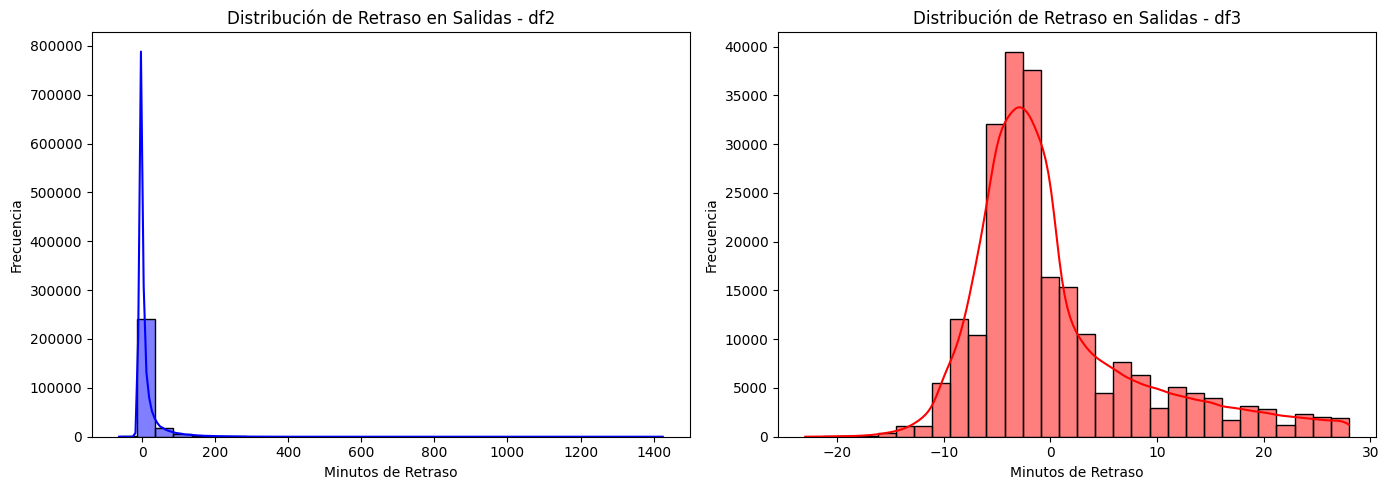

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Crea los subplots

# Gráfico para df2
sns.histplot(data=df2, x='retraso_salida', kde=True, bins=30, color='blue', ax=axes[0])
axes[0].set_title("Distribución de Retraso en Salidas - df2")
axes[0].set_xlabel("Minutos de Retraso")
axes[0].set_ylabel("Frecuencia")

# Gráfico para df3
sns.histplot(data=df3, x='retraso_salida', kde=True, bins=30, color='red', ax=axes[1])
axes[1].set_title("Distribución de Retraso en Salidas - df3")
axes[1].set_xlabel("Minutos de Retraso")
axes[1].set_ylabel("Frecuencia")

plt.tight_layout()  # Ajuste de layout
plt.show()

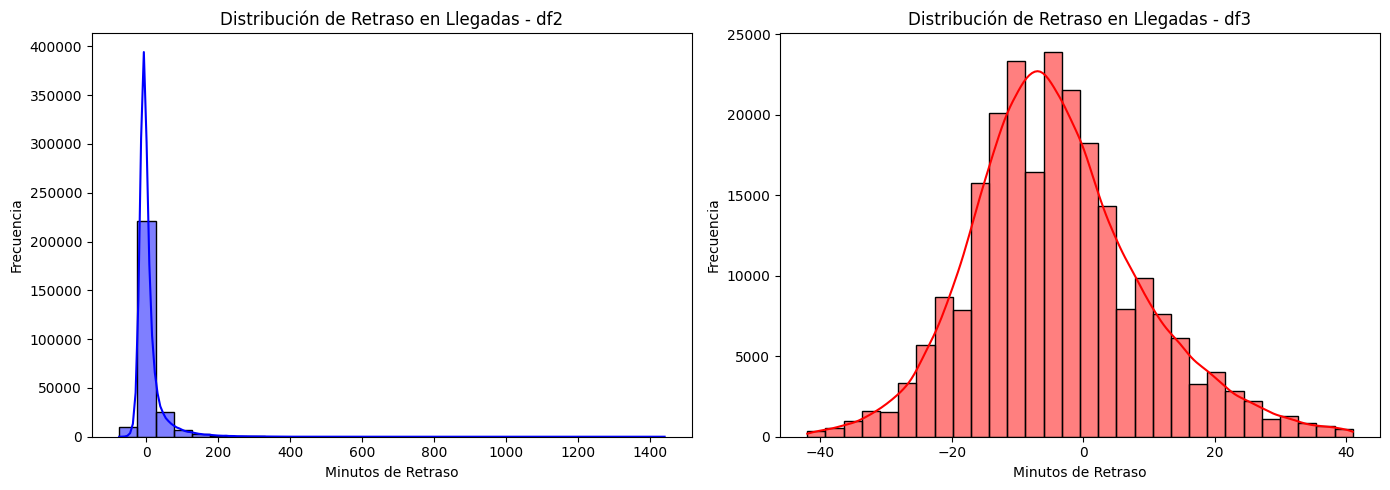

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Crea los subplots

# Grafica para df2
sns.histplot(data=df2, x='retraso_llegada', kde=True, bins=30, color='blue', ax=axes[0])
axes[0].set_title("Distribución de Retraso en Llegadas - df2")
axes[0].set_xlabel("Minutos de Retraso")
axes[0].set_ylabel("Frecuencia")

# Gráfico para df3
sns.histplot(data=df3, x='retraso_llegada', kde=True, bins=30, color='red', ax=axes[1])
axes[1].set_title("Distribución de Retraso en Llegadas - df3")
axes[1].set_xlabel("Minutos de Retraso")
axes[1].set_ylabel("Frecuencia")

plt.tight_layout()  # Ajuste de layout
plt.show()

## 4.2 Retrasos medios de llegada y salidas

He filtrado los valores de retraso con más de 15 minutos pues es la condición TRUE definida en el case.

In [86]:
print(f"Retraso medio de salida: {df3[df3['retraso_salida'] > 15]['retraso_salida'].mean():.2f}")
print(f"Retraso medio de llegada: {df3[df3['retraso_llegada'] > 15]['retraso_llegada'].mean():.2f}")

Retraso medio de salida: 21.15
Retraso medio de llegada: 23.37


## 4.3 Ranking de companias aereas en retrasos

Para crear en ranking mantuvimos el mismo filtro en valores > 15 minutos para que no afecte el calculo de la media.


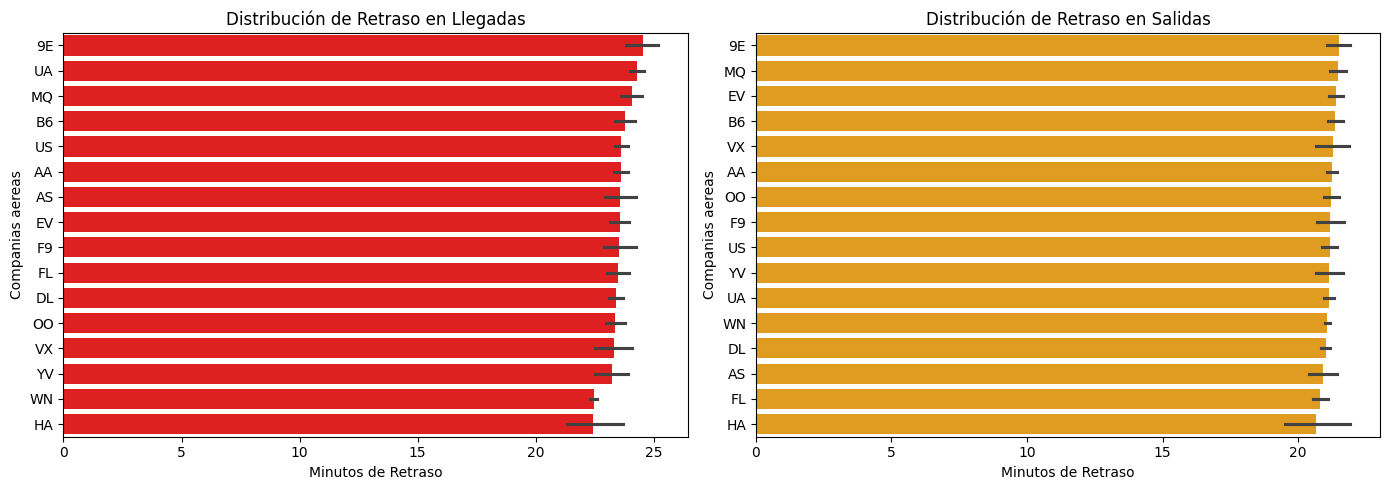

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Crea los subplots

# Grafica para llegada
order = df3[df3['retraso_llegada']>15].groupby('compania')['retraso_llegada'].mean().sort_values(ascending=False).index

sns.barplot(data=df3[df3['retraso_llegada']>15], x='retraso_llegada', y='compania', color='red', ax=axes[0], order=order)
axes[0].set_title("Distribución de Retraso en Llegadas")
axes[0].set_xlabel("Minutos de Retraso")
axes[0].set_ylabel("Companias aereas")

# Grafica para salida
order1 = df3[df3['retraso_salida']>15].groupby('compania')['retraso_salida'].mean().sort_values(ascending=False).index

sns.barplot(data=df3[df3['retraso_salida']>15], x='retraso_salida', y='compania', color='orange', ax=axes[1], order=order1)
axes[1].set_title("Distribución de Retraso en Salidas")
axes[1].set_xlabel("Minutos de Retraso")
axes[1].set_ylabel("Companias aereas")

plt.tight_layout()  # Ajuste de layout
plt.show()

Text(0, 0.5, 'Aeropuertos')

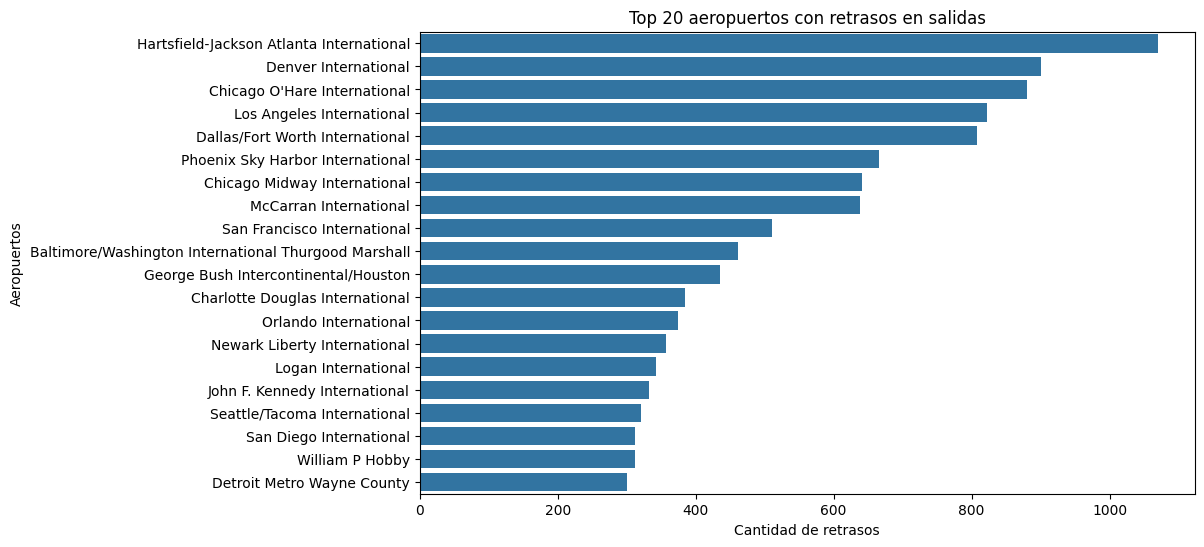

In [133]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=df3[df3['retraso_salida']>15].groupby('aeropuerto_origen')['salida_tarde'].sum().reset_index(name='count').sort_values('count', ascending=False).head(20), y='aeropuerto_origen', x='count')
ax.set_title("Top 20 aeropuertos con retrasos en salidas")
ax.set_xlabel("Cantidad de retrasos")
ax.set_ylabel("Aeropuertos")